In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
from pydantic import BaseModel
from typing import Optional

class MechanicalProps(BaseModel):
    c11: float
    c12: float
    c44: float
    bulk_modulus: float
    shear_modulus: float
    shear_modulus2: Optional[float]
    poisson_ratio: float

In [29]:
# path2target = '/home/y1u0d2/result/n2p2/SiO2/03/run3/elastic'
path2target = '/home/y1u0d2/result/n2p2/Si/103/dimer_10x_sf_long/elastic'
# path2target = '/home/y1u0d2/result/n2p2/Si/102/02_sf_selected/elastic'

elastic_dirs = glob(f'{path2target}/e_*')

In [30]:
def get_mechanical_props(lines) -> MechanicalProps:
    for l in lines:
        if 'Elastic Constant C11all' in l and 'GPa' in l:
            C11 = float(l.split(' ')[-2])
        
        if 'Elastic Constant C12all' in l and 'GPa' in l:
            C12 = float(l.split(' ')[-2])
        
        if 'Elastic Constant C44all' in l and 'GPa' in l:
            C44 = float(l.split(' ')[-2])

        if 'Bulk Modulus' in l and 'GPa' in l:
            bulk_modulus = float(l.split(' ')[-2])
        
        if 'Shear Modulus 1' in l and 'GPa' in l:
            shear_modulus = float(l.split(' ')[-2])
        
        if 'Shear Modulus 2' in l and 'GPa' in l:
            shear_modulus2 = float(l.split(' ')[-2])
        
        if 'Poisson Ratio' in l and '$' not in l:
            poisson_ratio = float(l.split(' ')[-1])
        
    return MechanicalProps(
        c11=C11,
        c12=C12,
        c44=C44,
        bulk_modulus=bulk_modulus,
        shear_modulus=shear_modulus,
        shear_modulus2=shear_modulus2,
        poisson_ratio=poisson_ratio
    )

In [31]:
props_dict = {}
for path in elastic_dirs:
    try:
        with open(os.path.join(path, 'log.lammps'), mode='r') as f:
            lines = [s.strip() for s in f.readlines()]
        props = get_mechanical_props(lines)
        epoch = int(path.split('/')[-1].split('_')[-1])
        props_dict[epoch] = props
    except:
        continue

In [32]:
mechanical_prop_df = pd.DataFrame.from_dict([{"epoch": k, **v.model_dump()} for k, v in props_dict.items()])

In [33]:
mechanical_prop_df

,epoch,c11,c12,c44,bulk_modulus,shear_modulus,shear_modulus2,poisson_ratio
0,0,-3.734759e+03,6.040472e+04,311.483155,2.048112e+05,276.092971,267.415408,0.499347
1,1,7.509651e+01,3.850898e+01,39.204315,5.070482e+01,39.204315,18.293764,0.338971
2,2,8.127623e+01,5.228333e+01,31.305221,6.194763e+01,31.305222,14.496449,0.391461
3,3,1.086781e+06,1.086755e+06,56.816968,1.086763e+06,69.240127,13.053231,0.499994
4,4,2.339025e+05,2.338665e+05,79.275900,2.338785e+05,79.198839,18.000535,0.499962
...,...,...,...,...,...,...,...,...
196,196,7.249684e+01,4.054028e+01,36.008304,5.119247e+01,36.008304,15.978283,0.358646
197,197,6.397913e+01,3.156111e+01,38.188500,4.236711e+01,38.188500,16.209010,0.330344
198,198,7.098171e+01,4.003515e+01,37.944253,5.035067e+01,37.944253,15.473280,0.360622
199,199,7.090178e+01,3.967516e+01,37.260861,5.008403e+01,37.260861,15.613311,0.358801


In [34]:
mechanical_prop_df = mechanical_prop_df.query('epoch > 1')

(array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 179

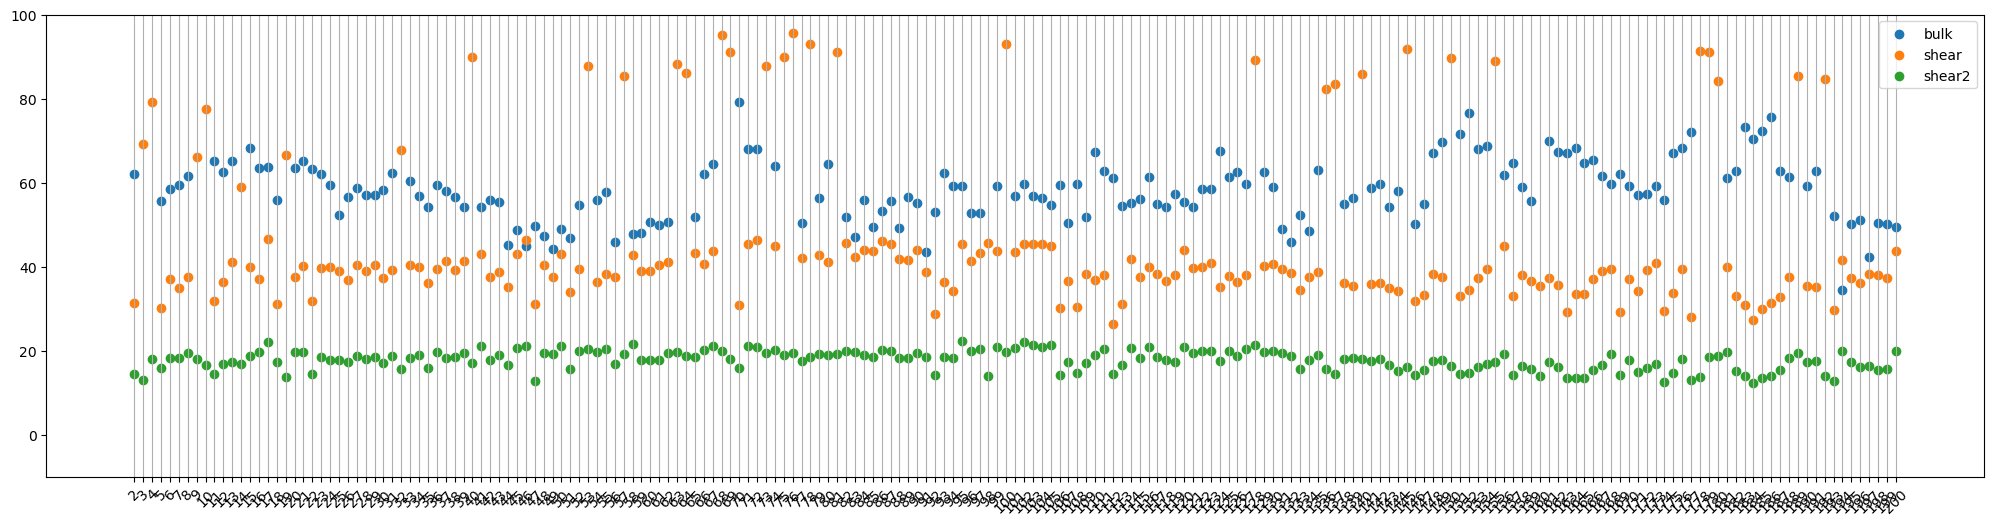

In [35]:
fig = plt.figure(figsize=(25,6))
ax = fig.add_subplot(111)

ax.scatter(mechanical_prop_df['epoch'], mechanical_prop_df['bulk_modulus'], label='bulk')
ax.scatter(mechanical_prop_df['epoch'], mechanical_prop_df['shear_modulus'], label='shear')
ax.scatter(mechanical_prop_df['epoch'], mechanical_prop_df['shear_modulus2'], label='shear2')
ax.grid(axis='x')
ax.legend()
ax.set_ylim(-10, 100)
ax.set_xticks(sorted(mechanical_prop_df['epoch'].values))
plt.xticks(rotation=45)

In [41]:
mechanical_prop_df.query("epoch == 72")

,epoch,c11,c12,c44,bulk_modulus,shear_modulus,shear_modulus2,poisson_ratio
72,72,95.761604,54.054784,46.291402,67.957057,46.291402,20.85341,0.360807


# DFTの値との差を計算する

In [37]:
quantum_espresso_mechanical_props = MechanicalProps(
    c11=153.371883,
    c12=56.731825,
    c44=77.381183,
    bulk_modulus=88.945178,
    shear_modulus=65.756721,
    shear_modulus2=np.inf,
    poisson_ratio=0.20344
)

In [38]:
def calc_mechanical_props_diff(predicted: MechanicalProps, reference: MechanicalProps):
    # calculate absolute error % of mechanical properties
    diff = {}
    for k, v in predicted.model_dump().items():
        diff[k] = np.abs(v - getattr(reference, k)) / getattr(reference, k) * 100
    return diff

In [39]:
epoch_error_dict = {}

for epoch, predicted_mechanical_props in props_dict.items():
    mechanical_props_diff_dict = calc_mechanical_props_diff(
        predicted=predicted_mechanical_props,
        reference=quantum_espresso_mechanical_props
    )
    # remove shear_modulus2
    del mechanical_props_diff_dict['shear_modulus2']

    # sum of absolute error
    total_error = sum(mechanical_props_diff_dict.values())
    print(f"Epoch: {epoch}, Total Error: {total_error:.2f} %")
    epoch_error_dict[epoch] = total_error

Epoch: 0, Total Error: 339843.84 %
Epoch: 1, Total Error: 282.49 %
Epoch: 2, Total Error: 289.56 %
Epoch: 3, Total Error: 3845904.78 %
Epoch: 4, Total Error: 827553.67 %
Epoch: 5, Total Error: 305.28 %
Epoch: 6, Total Error: 271.24 %
Epoch: 7, Total Error: 274.25 %
Epoch: 8, Total Error: 258.63 %
Epoch: 9, Total Error: 2276170.21 %
Epoch: 10, Total Error: 485233.50 %
Epoch: 11, Total Error: 279.85 %
Epoch: 12, Total Error: 266.31 %
Epoch: 13, Total Error: 244.67 %
Epoch: 14, Total Error: 1424881.37 %
Epoch: 15, Total Error: 236.28 %
Epoch: 16, Total Error: 254.01 %
Epoch: 17, Total Error: 219.69 %
Epoch: 18, Total Error: 296.86 %
Epoch: 19, Total Error: 2740584.39 %
Epoch: 20, Total Error: 252.47 %
Epoch: 21, Total Error: 241.13 %
Epoch: 22, Total Error: 285.08 %
Epoch: 23, Total Error: 253.54 %
Epoch: 24, Total Error: 262.14 %
Epoch: 25, Total Error: 281.70 %
Epoch: 26, Total Error: 279.57 %
Epoch: 27, Total Error: 259.66 %
Epoch: 28, Total Error: 269.85 %
Epoch: 29, Total Error: 263.

/tmp/ipykernel_393391/3541715363.py:5: RuntimeWarning: invalid value encountered in double_scalars
  diff[k] = np.abs(v - getattr(reference, k)) / getattr(reference, k) * 100


In [40]:
# print 5 epochs with lowest error
sorted_epoch_error_dict = sorted(epoch_error_dict.items(), key=lambda x: x[1])
for epoch, error in sorted_epoch_error_dict[:10]:
    print(f"Epoch: {epoch}, Total Error: {error:.2f} %")

Epoch: 72, Total Error: 213.01 %
Epoch: 71, Total Error: 215.09 %
Epoch: 17, Total Error: 219.69 %
Epoch: 67, Total Error: 229.14 %
Epoch: 74, Total Error: 229.77 %
Epoch: 102, Total Error: 233.19 %
Epoch: 95, Total Error: 233.83 %
Epoch: 15, Total Error: 236.28 %
Epoch: 156, Total Error: 237.51 %
Epoch: 176, Total Error: 239.79 %
